In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from yolo_opencv import get_objects

In [18]:
objs = get_objects('IMG_20191030_132551.jpg')
print(objs)
image = None
for obj in objs:
    if obj[0] == 'car':
        image = obj[1]

[]


In [16]:
image = cv2.resize(image, (640, 480))

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


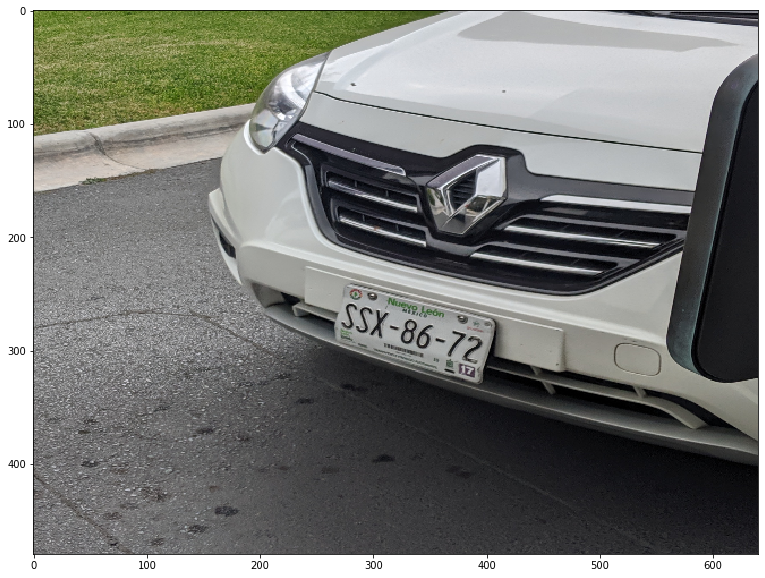

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [5]:
#image = cv2.resize(image, (640, 480))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grey scale

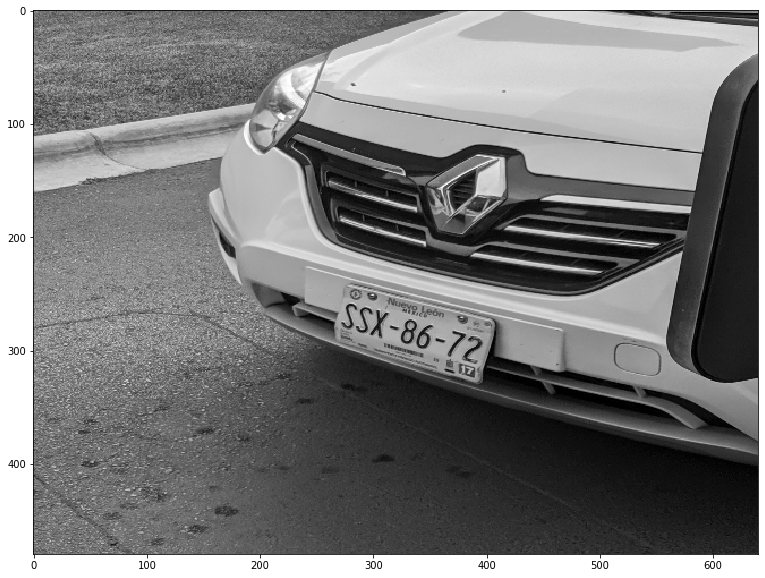

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray, cmap='gray')

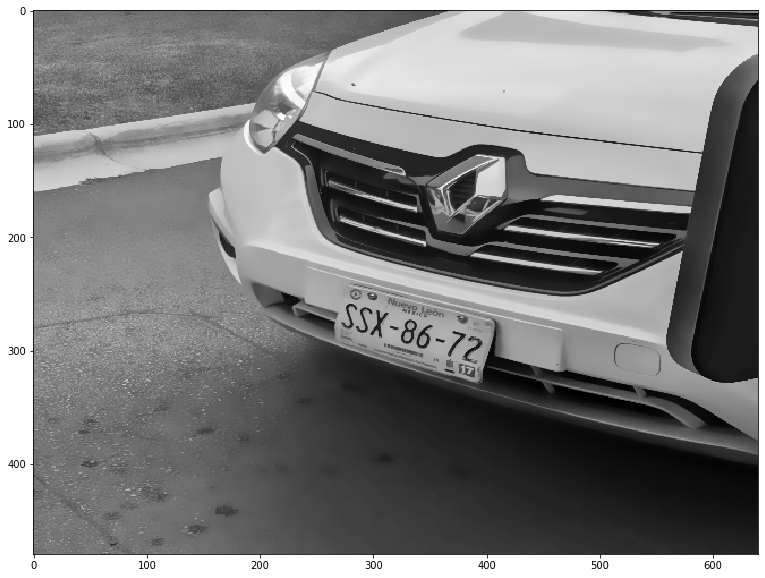

In [7]:
gray = cv2.bilateralFilter(gray, 15, 22, 22)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(gray, cmap='gray')

In [ ]:
# Calculate best parameters for canny edges.
#high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#lowThresh = 0.5*high_thresh

lowThresh = 50
high_thresh = 150

In [ ]:
print(lowThresh, high_thresh)

In [ ]:
edged = cv2.Canny(gray, lowThresh, high_thresh) #Perform Edge detection

In [ ]:
#kernel = np.ones((2,2),np.uint8)
#dilation = cv2.dilate(edged,kernel,iterations = 1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(edged, cmap='gray')

In [ ]:
_, contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=10)

candidates = []

i = 0
for c in contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
    if len(approx) == 4:
        area = cv2.contourArea(approx)
        perimeter = cv2.contourArea(approx)
        if len(approx) == 4:
            rect = cv2.minAreaRect(approx)
            print(i, area, perimeter)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            candidates.append(box)
            i = i + 1

In [ ]:
import numpy as np

contour_mask = np.zeros(gray.shape,np.uint8)
cv2.drawContours(contour_mask, candidates, -1, (255, 255, 255), -1)

img1_bg = cv2.bitwise_and(gray,gray,mask = contour_mask)

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img1_bg, cmap="gray")

In [ ]:
(x, y) = np.where(contour_mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped_img_gray = gray[topx:bottomx+1, topy:bottomy+1]
cropped_img = image[topx:bottomx+1, topy:bottomy+1]

cropped_img_gray = cv2.resize(cropped_img_gray, (500, 300))
cropped_img = cv2.resize(cropped_img, (500, 300))

In [ ]:
#cv2.imwrite("cropped_img.png", cropped_img)
#cv2.imwrite("cropped_img_gray.png", cropped_img_gray)